# ARBOLES DE DECISION EN DATOS DE SOBREVIVIENTES DEL TITANIC

In [2]:
#----------------------------------------------------------
# Se importan las librerias
#----------------------------------------------------------

import numpy as np
import pandas as pd
import sklearn
import warnings

## 1. Leer el archivo titanic.csv. Tenga en cuenta que los elementos del archivo están separados por ‘;’

In [3]:
#----------------------------------------------------------
# Url de los datos
#----------------------------------------------------------

url= ("https://raw.githubusercontent.com/MavelSterling/Informe_Inteligencia_Artificial/main/titanic.csv")

#----------------------------------------------------------
# Se cargan los datos
#----------------------------------------------------------
datos = pd.read_csv(url, sep=";")
datos

,survived,Name,pclass,sex,age,sibsp,parch,fare,who,embark_town,alone
0,0,"Braund, Mr. Owen Harris",3,male,22.0,1,0,7.2500,man,Southampton,no
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,71.2833,woman,Cherbourg,no
2,1,"Heikkinen, Miss. Laina",3,female,26.0,0,0,7.9250,woman,Southampton,yes
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,53.1000,woman,Southampton,no
4,0,"Allen, Mr. William Henry",3,male,35.0,0,0,8.0500,man,Southampton,yes
...,...,...,...,...,...,...,...,...,...,...,...
886,0,"Montvila, Rev. Juozas",2,male,27.0,0,0,13.0000,man,Southampton,yes
887,1,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,30.0000,woman,Southampton,yes
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,23.4500,woman,Southampton,no
889,1,"Behr, Mr. Karl Howell",1,male,26.0,0,0,30.0000,man,Cherbourg,yes


In [4]:
#----------------------------------------------------------
# Información de la base de datos
#----------------------------------------------------------

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   Name         891 non-null    object 
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   who          891 non-null    object 
 9   embark_town  889 non-null    object 
 10  alone        891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


## 2. Eliminar el atributo Name usando el comando datos.drop(["Name"], axis = 1, inplace = True)

In [5]:
#----------------------------------------------------------
# Eliminar el atributo Name
#----------------------------------------------------------

datos.drop(["Name"], axis = 1, inplace = True)

#----------------------------------------------------------
# Observar los datos sin el atributo Name
#----------------------------------------------------------
datos

,survived,pclass,sex,age,sibsp,parch,fare,who,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,Southampton,no
1,1,1,female,38.0,1,0,71.2833,woman,Cherbourg,no
2,1,3,female,26.0,0,0,7.9250,woman,Southampton,yes
3,1,1,female,35.0,1,0,53.1000,woman,Southampton,no
4,0,3,male,35.0,0,0,8.0500,man,Southampton,yes
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,man,Southampton,yes
887,1,1,female,19.0,0,0,30.0000,woman,Southampton,yes
888,0,3,female,NaN,1,2,23.4500,woman,Southampton,no
889,1,1,male,26.0,0,0,30.0000,man,Cherbourg,yes


In [6]:
#----------------------------------------------------------
# Información de las variables de la base de datos
#----------------------------------------------------------
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   who          891 non-null    object 
 8   embark_town  889 non-null    object 
 9   alone        891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [7]:
#----------------------------------------------------------
# Variables categóricas (tipo object)
#----------------------------------------------------------
datos.select_dtypes(include=['object']).describe()

,sex,who,embark_town,alone
count,891,891,889,891
unique,2,3,3,2
top,male,man,Southampton,yes
freq,577,537,644,537


Se hace un resumen de las variables cuantitativas (tipo entero), para analizar la media, la desviación estándar, mínimo, 25%, 50% (mediana), 75% y el máximo

In [8]:
#----------------------------------------------------------
# Variables cuantitativas (tipo entero)
#----------------------------------------------------------
datos.select_dtypes(include=['int64']).describe()

,survived,pclass,sibsp,parch
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594
std,0.486592,0.836071,1.102743,0.806057
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,0.000000
max,1.000000,3.000000,8.000000,6.000000


Se hace un resumen de las variables cuantitativas (tipo real), para analizar la media, la desviación estándar, mínimo, 25%, 50% (mediana), 75% y el máximo

In [9]:
#----------------------------------------------------------
# Variables cuantitativas (tipo real)
#----------------------------------------------------------
datos.select_dtypes(include=['float64']).describe()

,age,fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


## 3. Seleccionar aleatoriamente el 80% del conjunto de datos para entrenar y el 20% restante para las pruebas

In [10]:
#----------------------------------------------------------
# Libreria sklearn
#----------------------------------------------------------
from sklearn.model_selection import train_test_split 

N=len(datos) # cantidad de datos
cTrain=int(N*0.8) # 80% para entrenar y 20% para probar
cTest=N-cTrain 

print(N,cTrain,cTest)# cantidad de: datos completos, datos entrenados, datos para probar

train_data,test_data= sklearn.model_selection.train_test_split(datos, train_size=cTrain, test_size=cTest)

891 712 179


891 es el número de observaciones en la base de datos

712 es el 80% de las observaciones de la base de datos que se van a utilizar para entrenar los datos

179 es el 20% de las observaciones de la base de datos que se van a utilizar para probar el modelo de predicción

In [11]:
#----------------------------------------------------------
# Dimensiones de los datos de entrenamiento
#----------------------------------------------------------
train_data.shape

(712, 10)

In [12]:
#----------------------------------------------------------
# Mostrar las primeras 5 filas de los datos de entrenamiento
#----------------------------------------------------------

train_data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,who,embark_town,alone
221,0,2,male,27.0,0,0,13.0000,man,Southampton,yes
297,0,1,female,2.0,1,2,151.5500,child,Southampton,no
463,0,2,male,48.0,0,0,13.0000,man,Southampton,yes
421,0,3,male,21.0,0,0,7.7333,man,Queenstown,yes
614,0,3,male,35.0,0,0,8.0500,man,Southampton,yes


In [13]:
#----------------------------------------------------------
# Estadísticas descriptivas datos de entrenamiento
#----------------------------------------------------------
train_data.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,577.000000,712.000000,712.000000,712.000000
mean,0.389045,2.316011,29.774991,0.528090,0.394663,32.387476
std,0.487876,0.828380,14.427629,1.033502,0.816582,51.258767
min,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.479150
75%,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4. Utilizar una estrategia para normalizar los datos


### Pipeline para los atributos categóricos

In [14]:
#----------------------------------------------------------
#Libreria sklearn
#----------------------------------------------------------
from sklearn.preprocessing import OneHotEncoder 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 5 variables categoricas
cat_attribs = ['pclass','sex','who','embark_town','alone']

cat_pipeline = Pipeline([
("imputer", SimpleImputer(strategy="most_frequent")), 
("cat_encoder", OneHotEncoder(sparse=False))
])


### Pipeline para los atributos numéricos

In [15]:
#----------------------------------------------------------
#Libreria sklearn
#----------------------------------------------------------
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

# Variables númericas

num_attribs = ['pclass','age', 'fare', 'sibsp', 'parch']
num_pipeline = Pipeline([("imputer", SimpleImputer(strategy="median")),
                         ("scaler", StandardScaler())])

### Pipeline completo

In [16]:
#----------------------------------------------------------
#Libreria sklearn
#----------------------------------------------------------
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([ ("num", num_pipeline, num_attribs), 
                                   ("cat", cat_pipeline, cat_attribs),])

In [17]:
#----------------------------------------------------------
# Se transforman los datos entrenados 
# Variables independientes
#----------------------------------------------------------

X_train = full_pipeline.fit_transform(train_data)
X_train.shape

(712, 18)

In [18]:
X_train[0,:]

array([-0.38174929, -0.18763881, -0.3784934 , -0.51133042, -0.48365031,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.        ])

In [19]:
#----------------------------------------------------------
# Variable dependiente -> survived
#----------------------------------------------------------

y_train = train_data["survived"]
y_train

221    0
297    0
463    0
421    0
614    0
      ..
190    1
619    0
654    0
641    1
394    1
Name: survived, Length: 712, dtype: int64

In [20]:
X_test = full_pipeline.transform(test_data) 
X_test

array([[ 0.82627513, -1.95749614, -0.30625989, ...,  1.        ,
         1.        ,  0.        ],
       [-1.58977371,  1.5052682 ,  0.86566451, ...,  0.        ,
         1.        ,  0.        ],
       [-1.58977371,  0.12016246,  2.58633521, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.82627513, -0.80324136, -0.47814052, ...,  1.        ,
         0.        ,  1.        ],
       [-0.38174929, -0.18763881, -0.12469996, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.82627513,  1.35136756, -0.49074819, ...,  1.        ,
         0.        ,  1.        ]])

In [21]:
y_test = test_data["survived"]
y_test

10     1
52     1
318    1
389    1
286    1
      ..
409    0
340    1
646    0
551    0
592    0
Name: survived, Length: 179, dtype: int64

### 5. Configurar los hiperparámetros del árbol de decisión de la siguiente manera: criterion=gini, splitter=best, y random_state=123. Obtener 10 árboles de decisión que resultan de modificar el hiperparámetro max_depth desde 10 hasta 100 con incrementos de 10

In [49]:
#----------------------------------------------------------
#Librerias sklearn.tree y sklearn.model_selection
#----------------------------------------------------------
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

scores=[]
decision_tree = []
max_depths = range(10, 110, 10)

for max_depth in max_depths: 
    model_tree = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=max_depth, random_state=123)
    model_tree.fit(X_train, y_train)
    decision_tree.append(model_tree.score(X_test, y_test))
    scores = cross_val_score(model_tree, X_train, y_train, cv=5,scoring='accuracy')
    print("----------------------------------")
    print("Puntajes de la validación cruzada:")
    print(scores)
    print(f"Promedio de los puntajes con max_depth={max_depth}","->" ,round(scores.mean(),4))
    print("----------------------------------")
    #plt.figure(figsize=(15,10))
    #tree.plot_tree(model_tree, filled=True); # Se grafica cada árbol
    #plt.title(f"Árbol de decisión con max_depth={max_depth}") # título de los árboles
    
#----------------------------------------------------------   
# El índice del árbol con mayor precisión
best_tree_index = np.argmax(scores)
#----------------------------------------------------------

#----------------------------------------------------------
# Se imprime los hiperparámetros del árbol con mayor precisión
print("Los hiperparámetros del árbol con mayor precisión son:")
print("max_depth:", max_depths[best_tree_index])
print("criterion: gini")
print("splitter: best")
print("random_state: 123")



----------------------------------
Puntajes de la validación cruzada:
[0.7972028  0.76223776 0.73239437 0.78873239 0.79577465]
Promedio de los puntajes con max_depth=10 -> 0.7753
----------------------------------
----------------------------------
Puntajes de la validación cruzada:
[0.7972028  0.72027972 0.73943662 0.75352113 0.78873239]
Promedio de los puntajes con max_depth=20 -> 0.7598
----------------------------------
----------------------------------
Puntajes de la validación cruzada:
[0.7972028  0.72027972 0.73943662 0.75352113 0.78873239]
Promedio de los puntajes con max_depth=30 -> 0.7598
----------------------------------
----------------------------------
Puntajes de la validación cruzada:
[0.7972028  0.72027972 0.73943662 0.75352113 0.78873239]
Promedio de los puntajes con max_depth=40 -> 0.7598
----------------------------------
----------------------------------
Puntajes de la validación cruzada:
[0.7972028  0.72027972 0.73943662 0.75352113 0.78873239]
Promedio de los p

In [60]:
#----------------------------------------------------------
#Librerias sklearn.metrics
#----------------------------------------------------------
from sklearn.metrics import confusion_matrix

# El árbol con la mayor precisión de la simulación
best_tree = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=max_depths[best_tree_index], random_state=123)
best_tree.fit(X_train, y_train)

# Se hace las predicciones para los datos de prueba
y_pred = best_tree.predict(X_test)

# Calcular la matriz de confusión
confusion_Punto5 = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion_Punto5)

Matriz de confusión:
[[93 21]
 [12 53]]


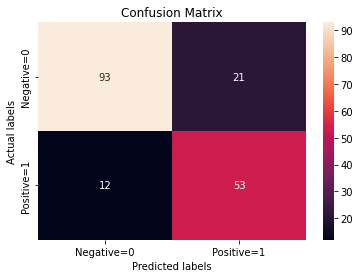

In [61]:
#----------------------------------------------------------
#Librerias matplotlib y seaborn
#----------------------------------------------------------
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
sns.heatmap(confusion_Punto5, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1']);
plt.show();

### 6. Incluya en el notebook una tabla con el accuracy para los 10 árboles del punto anterior

In [32]:
#----------------------------------------------------------
#Libreria pandas
#----------------------------------------------------------
import pandas as pd

# Mostrar el accuracy de los 10 arboles construidos
accuracies = pd.DataFrame({"max_depth": range(10, 110, 10), "accuracy": decision_tree})
display(accuracies)

,max_depth,accuracy
0,10,0.815642
1,20,0.787709
2,30,0.787709
3,40,0.787709
4,50,0.787709
5,60,0.787709
6,70,0.787709
7,80,0.787709
8,90,0.787709
9,100,0.787709


### 7. Repita el mismo procedimiento del punto 5 usando como hiperparámetros criterion=entropy, splitter=best, y random_state=123. Compare los 10 valores obtenidos con los del punto 5

In [55]:
#----------------------------------------------------------
#Librerias sklearn.tree y sklearn.model_selection
#----------------------------------------------------------
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

scores_2=[]
decision_tree_2 = []
max_depths = range(10, 110, 10)

for max_depth in max_depths: 
    model_tree_2 = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=max_depth, random_state=123)
    model_tree_2.fit(X_train, y_train)
    decision_tree_2.append(model_tree_2.score(X_test, y_test))
    scores_2 = cross_val_score(model_tree_2, X_train, y_train, cv=5,scoring='accuracy')
    print("----------------------------------")
    print("Puntajes de la validación cruzada:")
    print(scores_2)
    print(f"Promedio de los puntajes con max_depth={max_depth}","->" ,round(scores_2.mean(),4))
    print("----------------------------------")
   # plt.figure(figsize=(15,10))
   # tree.plot_tree(model_tree_2, filled=True); # Se grafica cada árbol
   # plt.title(f"Árbol de decisión con max_depth={max_depth}")

#----------------------------------------------------------
# El índice del árbol con mayor precisión
best_tree_index_2 = np.argmax(scores_2)
#----------------------------------------------------------

#----------------------------------------------------------
# Se imprime los hiperparámetros del árbol con mayor precisión
print("Los hiperparámetros del árbol con mayor precisión son:")
print("max_depth:", max_depths[best_tree_index_2])
print("criterion: entropy")
print("splitter: best")
print("random_state: 123")

----------------------------------
Puntajes de la validación cruzada:
[0.7972028  0.7972028  0.76760563 0.77464789 0.76056338]
Promedio de los puntajes con max_depth=10 -> 0.7794
----------------------------------
----------------------------------
Puntajes de la validación cruzada:
[0.78321678 0.7972028  0.72535211 0.74647887 0.78169014]
Promedio de los puntajes con max_depth=20 -> 0.7668
----------------------------------
----------------------------------
Puntajes de la validación cruzada:
[0.78321678 0.79020979 0.72535211 0.74647887 0.78169014]
Promedio de los puntajes con max_depth=30 -> 0.7654
----------------------------------
----------------------------------
Puntajes de la validación cruzada:
[0.78321678 0.79020979 0.72535211 0.74647887 0.78169014]
Promedio de los puntajes con max_depth=40 -> 0.7654
----------------------------------
----------------------------------
Puntajes de la validación cruzada:
[0.78321678 0.79020979 0.72535211 0.74647887 0.78169014]
Promedio de los p

In [56]:
#----------------------------------------------------------
#Libreria pandas
#----------------------------------------------------------
import pandas as pd

# Mostrar el accuracy de los 10 arboles construidos 
accuracies_2 = pd.DataFrame({"max_depth": range(10, 110, 10), "accuracy": decision_tree_2})
display(accuracies_2)

,max_depth,accuracy
0,10,0.787709
1,20,0.782123
2,30,0.776536
3,40,0.776536
4,50,0.776536
5,60,0.776536
6,70,0.776536
7,80,0.776536
8,90,0.776536
9,100,0.776536


In [63]:
#----------------------------------------------------------
#Librerias sklearn.metrics
#----------------------------------------------------------
from sklearn.metrics import confusion_matrix

# El árbol con la mayor precisión de la simulación
best_tree_2 = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=max_depths[best_tree_index_2], random_state=123)
best_tree_2.fit(X_train, y_train)

# Se hace las predicciones para los datos de prueba
y_pred_2 = best_tree_2.predict(X_test)

# Calcular la matriz de confusión
confusion_Punto7 = confusion_matrix(y_test, y_pred_2)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion_Punto7)

Matriz de confusión:
[[87 27]
 [12 53]]


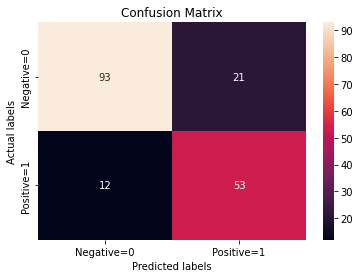

In [64]:
#----------------------------------------------------------
#Librerias matplotlib y seaborn
#----------------------------------------------------------
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
sns.heatmap(confusion_Punto5, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1']);
plt.show();

In [76]:
#----------------------------------------------------------
# Comparar los resultados con el punto 5
#----------------------------------------------------------

#----------------------------------------------------------
#Libreria pandas
#----------------------------------------------------------
import pandas as pd

df_accuracy = pd.concat([accuracies, accuracies_2], axis=1)
df_accuracy

display(df_accuracy)


,max_depth,accuracy,max_depth,accuracy
0,10,0.815642,10,0.787709
1,20,0.787709,20,0.782123
2,30,0.787709,30,0.776536
3,40,0.787709,40,0.776536
4,50,0.787709,50,0.776536
5,60,0.787709,60,0.776536
6,70,0.787709,70,0.776536
7,80,0.787709,80,0.776536
8,90,0.787709,90,0.776536
9,100,0.787709,100,0.776536


In [108]:
#----------------------------------------------------------
#Libreria numpy
#----------------------------------------------------------
import numpy as np


#----------------------------------------------------------
# Se define la matriz para los datos del punto 5
matrix_accuracies = np.array(accuracies)
print("Datos del punto 5")
print("--------------------------")
# Se imprime la matriz
print(matrix_accuracies)

i = 1 #Se extrae accuracy de la matriz
accuracy_1 = matrix_accuracies[:,i]
print(accuracy_1)
print("--------------------------")

#----------------------------------------------------------

# Se define la matriz para los datos del punto 7
matrix_accuracies_2 = np.array(accuracies_2)
print("Datos del punto 7")
print("--------------------------")
# Se imprime la matriz
print(matrix_accuracies_2)

i = 1 #Se extrae accuracy de la matriz
accuracy_2 = matrix_accuracies_2[:,i]
print(accuracy_2)
print("--------------------------")


Datos del punto 5
--------------------------
[[ 10.           0.81564246]
 [ 20.           0.7877095 ]
 [ 30.           0.7877095 ]
 [ 40.           0.7877095 ]
 [ 50.           0.7877095 ]
 [ 60.           0.7877095 ]
 [ 70.           0.7877095 ]
 [ 80.           0.7877095 ]
 [ 90.           0.7877095 ]
 [100.           0.7877095 ]]
[0.81564246 0.7877095  0.7877095  0.7877095  0.7877095  0.7877095
 0.7877095  0.7877095  0.7877095  0.7877095 ]
--------------------------
Datos del punto 7
--------------------------
[[ 10.           0.7877095 ]
 [ 20.           0.78212291]
 [ 30.           0.77653631]
 [ 40.           0.77653631]
 [ 50.           0.77653631]
 [ 60.           0.77653631]
 [ 70.           0.77653631]
 [ 80.           0.77653631]
 [ 90.           0.77653631]
 [100.           0.77653631]]
[0.7877095  0.78212291 0.77653631 0.77653631 0.77653631 0.77653631
 0.77653631 0.77653631 0.77653631 0.77653631]
--------------------------


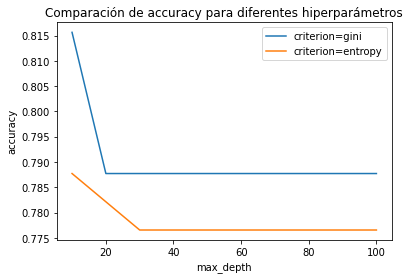

In [106]:
#----------------------------------------------------------
#Libreria matplotlib
#----------------------------------------------------------
import matplotlib.pyplot as plt


# Crea el gráfico de barras
plt.plot(max_depths, accuracy_1, label="criterion=gini")
plt.plot(max_depths, accuracy_2, label="criterion=entropy")


# Agrega etiquetas al eje x y y y un título al gráfico
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("Comparación de accuracy para diferentes hiperparámetros")

# Agrega una leyenda
plt.legend()

# Muestra el gráfico
plt.show()





### 8. Repita el mismo procedimiento del punto 5 usando como hiperparámetros criterion=entropy, splitter=random, y random_state=123.

In [96]:
#----------------------------------------------------------
#Librerias sklearn.tree y sklearn.model_selection
#----------------------------------------------------------
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

scores_3 = []
decision_tree_3 = []
for max_depth in range(10, 110, 10): 
    model_tree_3 = DecisionTreeClassifier(criterion="entropy", splitter="random", max_depth=max_depth, random_state=123)
    model_tree_3.fit(X_train, y_train)
    decision_tree_3.append(model_tree_3.score(X_test, y_test))
    scores_3 = model_tree_3.score(X_test, y_test)
    cross_val_scores_3 = cross_val_score(model_tree_3, X_train, y_train, cv=5,scoring='accuracy')
    print("---------------")
    print("Puntajes de la validación cruzada:")
    print(cross_val_scores_3)
    print(f"Promedio de los puntajes con max_depth={max_depth}","->" ,round(cross_val_scores_3.mean(),4))
    print("---------------")
    #plt.figure(figsize=(15,15))
    #tree.plot_tree(model_tree_3, filled=True);
    #plt.title(f"Árbol de decisión con max_depth={max_depth}")
    #tree.export_graphviz(decision_tree=model_tree_3, class_names=True,out_file="Arbol.dot")


best_tree_index_3 = np.argmax(scores_3)
print("Los hiperparámetros del árbol con mayor precisión son:")
print("max_depth:", max_depths[best_tree_index_3])
print("criterion: entropy")
print("splitter: random")
print("random_state: 123")

---------------
Puntajes de la validación cruzada:
[0.78321678 0.76923077 0.78169014 0.73943662 0.8028169 ]
Promedio de los puntajes con max_depth=10 -> 0.7753
---------------
---------------
Puntajes de la validación cruzada:
[0.77622378 0.74825175 0.70422535 0.70422535 0.83802817]
Promedio de los puntajes con max_depth=20 -> 0.7542
---------------
---------------
Puntajes de la validación cruzada:
[0.81118881 0.72727273 0.71126761 0.6971831  0.83098592]
Promedio de los puntajes con max_depth=30 -> 0.7556
---------------
---------------
Puntajes de la validación cruzada:
[0.81118881 0.72727273 0.71126761 0.6971831  0.83098592]
Promedio de los puntajes con max_depth=40 -> 0.7556
---------------
---------------
Puntajes de la validación cruzada:
[0.81118881 0.72727273 0.71126761 0.6971831  0.83098592]
Promedio de los puntajes con max_depth=50 -> 0.7556
---------------
---------------
Puntajes de la validación cruzada:
[0.81118881 0.72727273 0.71126761 0.6971831  0.83098592]
Promedio de 

In [97]:
#----------------------------------------------------------
#Libreria pandas
#----------------------------------------------------------
import pandas as pd

# Mostrar el accuracy de los 10 arboles construidos 
accuracies_3 = pd.DataFrame({"max_depth": range(10, 110, 10), "accuracy": decision_tree_3})
display(accuracies_3)

,max_depth,accuracy
0,10,0.826816
1,20,0.804469
2,30,0.770950
3,40,0.770950
4,50,0.770950
5,60,0.770950
6,70,0.770950
7,80,0.770950
8,90,0.770950
9,100,0.770950


In [98]:
#----------------------------------------------------------
#Librerias sklearn.metrics
#----------------------------------------------------------
from sklearn.metrics import confusion_matrix

# El árbol con la mayor precisión de la simulación
best_tree_3 = DecisionTreeClassifier(criterion="entropy", splitter="random", max_depth=max_depths[best_tree_index_3], random_state=123)
best_tree_3.fit(X_train, y_train)

# Se hace las predicciones para los datos de prueba
y_pred_3 = best_tree_3.predict(X_test)

# Calcular la matriz de confusión
confusion_Punto8 = confusion_matrix(y_test, y_pred_3)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion_Punto8)

Matriz de confusión:
[[100  14]
 [ 17  48]]


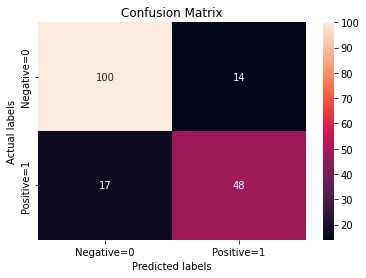

In [99]:
#----------------------------------------------------------
#Librerias matplotlib y seaborn
#----------------------------------------------------------
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
sns.heatmap(confusion_Punto8, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1']);
plt.show();

In [100]:
#----------------------------------------------------------
# Comparar los resultados con el punto 5,7,8
#----------------------------------------------------------

#----------------------------------------------------------
#Libreria pandas
#----------------------------------------------------------
import pandas as pd


df_accuracy_2 = pd.concat([accuracies, accuracies_2, accuracies_3], axis=1)

display(df_accuracy_2)

,max_depth,accuracy,max_depth,accuracy,max_depth,accuracy
0,10,0.815642,10,0.787709,10,0.826816
1,20,0.787709,20,0.782123,20,0.804469
2,30,0.787709,30,0.776536,30,0.770950
3,40,0.787709,40,0.776536,40,0.770950
4,50,0.787709,50,0.776536,50,0.770950
5,60,0.787709,60,0.776536,60,0.770950
6,70,0.787709,70,0.776536,70,0.770950
7,80,0.787709,80,0.776536,80,0.770950
8,90,0.787709,90,0.776536,90,0.770950
9,100,0.787709,100,0.776536,100,0.770950


### 9. Indique en el notebook los hiperparámetros que por el momento le permiten obtener el árbol con mayor accuracy

In [103]:
#----------------------------------------------------------
#Libreria numpy
#----------------------------------------------------------
import numpy as np


#----------------------------------------------------------
# Se define la matriz para los datos del punto 5
matrix_accuracies = np.array(accuracies)
print("Datos del punto 5")
print("--------------------------")

# Se imprime la matriz
print(matrix_accuracies)

i = 1 #Se extrae accuracy de la matriz
accuracy_1 = matrix_accuracies[:,i]
print(accuracy_1)
print("--------------------------")

#----------------------------------------------------------

# Se define la matriz para los datos del punto 7
matrix_accuracies_2 = np.array(accuracies_2)
print("Datos del punto 7")
print("--------------------------")

# Se imprime la matriz
print(matrix_accuracies_2)

i = 1 #Se extrae accuracy de la matriz
accuracy_2 = matrix_accuracies_2[:,i]
print(accuracy_2)
print("--------------------------")

#----------------------------------------------------------

# Se define la matriz para los datos del punto 8
matrix_accuracies_3 = np.array(accuracies_3)
print("Datos del punto 8")
print("--------------------------")

# Se imprime la matriz
print(matrix_accuracies_3)

i = 1 #Se extrae accuracy de la matriz
accuracy_3 = matrix_accuracies_3[:,i]
print(accuracy_3)
print("--------------------------")


Datos del punto 5
--------------------------
[[ 10.           0.81564246]
 [ 20.           0.7877095 ]
 [ 30.           0.7877095 ]
 [ 40.           0.7877095 ]
 [ 50.           0.7877095 ]
 [ 60.           0.7877095 ]
 [ 70.           0.7877095 ]
 [ 80.           0.7877095 ]
 [ 90.           0.7877095 ]
 [100.           0.7877095 ]]
[0.81564246 0.7877095  0.7877095  0.7877095  0.7877095  0.7877095
 0.7877095  0.7877095  0.7877095  0.7877095 ]
--------------------------
Datos del punto 7
--------------------------
[[ 10.           0.7877095 ]
 [ 20.           0.78212291]
 [ 30.           0.77653631]
 [ 40.           0.77653631]
 [ 50.           0.77653631]
 [ 60.           0.77653631]
 [ 70.           0.77653631]
 [ 80.           0.77653631]
 [ 90.           0.77653631]
 [100.           0.77653631]]
[0.7877095  0.78212291 0.77653631 0.77653631 0.77653631 0.77653631
 0.77653631 0.77653631 0.77653631 0.77653631]
--------------------------
Datos del punto 8
--------------------------
[[ 1

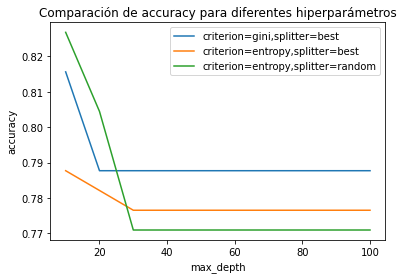

In [105]:
#----------------------------------------------------------
#Libreria matplotlib
#----------------------------------------------------------
import matplotlib.pyplot as plt


# Crea el gráfico de barras
plt.plot(max_depths, accuracy_1, label="criterion=gini,splitter=best")
plt.plot(max_depths, accuracy_2, label="criterion=entropy,splitter=best")
plt.plot(max_depths, accuracy_3, label="criterion=entropy,splitter=random")



# Agrega etiquetas al eje x y y y un título al gráfico
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("Comparación de accuracy para diferentes hiperparámetros")

# Agrega una leyenda
plt.legend()

# Muestra el gráfico
plt.show()

### 10. Seleccione uno de los hiperparámetros disponibles en la documentación (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) que sea diferente al criterion, splitter, max_depth, y random_state. Realice dos variaciones en el hiperparámetro seleccionado manteniendo los otros hiperparámetros del punto anterior. Indique el accuracy obtenido al modificar el hiperparámetro seleccionado y analice si el árbol de decisión mejora, empeora, o mantiene su exactitud.